In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [39]:
# lire le fichier xlsx avec Pandas
df = pd.read_excel("IEEE.xlsx")
#affichage de dataFrame
print(df)

               Les Urgences En MED DENT             Douleur Spontanée  \
0                Abcès apical chronique            Occassionnellement   
1                    Abcès apicale Aigu                      Continue   
2                    Abcès apicale Aigu                      Continue   
3                    Abcès apicale Aigu                      Continue   
4                             Cellulite                      Continue   
5                             Cellulite                      Continue   
6                             Cellulite                      Continue   
7                    Extrusion dentaire                           Oui   
8                             Gingivite                           Oui   
9             Parodontite apicale aiguë                           Oui   
10            Parodontite apicale aiguë                           Oui   
11            Parodontite apicale aiguë                           Oui   
12                       Péricoronarite  Oui irradi

In [40]:
#classer les données sur target et features
target = df["Les Urgences En MED DENT"]
features = df.drop(columns="Les Urgences En MED DENT")

In [41]:
#descritption descriptive de données
df.describe()

,Les Urgences En MED DENT,Douleur Spontanée,Douleur Provoquée,Mobilité,Vitalité,Palpation Apicale,Fievre,Asthenie,Odeur Fétide,Médication ATG,Soulager,Observations Exobuccales ( remarque generale )
count,37,37,37,37,37,37,37,37,37,37,37,37
unique,12,18,21,5,4,3,2,2,4,6,7,8
top,Pulpite irreversible symptomatique,Oui,Froid,Non,Dent vivante,Negatif,Non,Non,Non,"Efficace , si stade avancée non",Froid,Non
freq,15,6,3,23,26,28,27,31,27,15,18,23


In [42]:
from sklearn.model_selection import train_test_split
#split dataFrame to train data and test data
data_train, data_test, target_train, target_test = train_test_split( features, target, random_state=33)

In [43]:
#encodage des données de categoriel type au entier 
for col in (data_train.columns):
  le = LabelEncoder()
  data_train[col] = le.fit_transform(data_train[col])
 

In [44]:
#description de données de traitement
data_train.describe()

,Douleur Spontanée,Douleur Provoquée,Mobilité,Vitalité,Palpation Apicale,Fievre,Asthenie,Odeur Fétide,Médication ATG,Soulager,Observations Exobuccales ( remarque generale )
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,5.444444,9.111111,1.296296,1.481481,1.555556,0.333333,0.185185,0.592593,2.000000,2.703704,2.555556
std,3.226493,5.116589,1.067521,0.802418,0.800641,0.480384,0.395847,0.930643,1.593255,1.265361,1.395965
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,1.000000,1.000000,1.500000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000
50%,6.000000,9.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000
75%,8.000000,12.500000,1.500000,2.000000,2.000000,1.000000,0.000000,1.000000,3.000000,3.500000,4.000000
max,12.000000,18.000000,4.000000,2.000000,2.000000,1.000000,1.000000,3.000000,5.000000,6.000000,6.000000


In [45]:
#Normalisation des données
scaler = StandardScaler()
scaler.fit(data_train)
data_train = scaler.transform(data_train)

In [46]:
#redimenssionner les données utilisant PCA
pca = PCA(n_components=11)
pca_data = pca.fit_transform(data_train)

In [47]:
#classer les données  sur data_train et data_validation
data_t, data_validation, target_t, target_validation = train_test_split( pca_data, target_train, random_state=33)

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [49]:
#decisiontree
ModelDT = DecisionTreeClassifier(max_depth=50)
ModelDT.fit(data_t, target_t)
sc = ModelDT.score(data_validation, target_validation)
print('score de la model DecisionTree est ', round(sc*100),"%")

score de la model DecisionTree est  71 %


[Text(0.3076923076923077, 0.9375, 'x[0] <= -1.086\ngini = 0.785\nsamples = 20\nvalue = [2, 2, 1, 1, 3, 8, 1, 1, 1]'),
 Text(0.15384615384615385, 0.8125, 'x[8] <= -0.133\ngini = 0.397\nsamples = 11\nvalue = [0, 0, 0, 0, 3, 8, 0, 0, 0]'),
 Text(0.07692307692307693, 0.6875, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 3, 0, 0, 0, 0]'),
 Text(0.23076923076923078, 0.6875, 'gini = 0.0\nsamples = 8\nvalue = [0, 0, 0, 0, 0, 8, 0, 0, 0]'),
 Text(0.46153846153846156, 0.8125, 'x[1] <= -1.092\ngini = 0.84\nsamples = 9\nvalue = [2, 2, 1, 1, 0, 0, 1, 1, 1]'),
 Text(0.38461538461538464, 0.6875, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.5384615384615384, 0.6875, 'x[1] <= 0.608\ngini = 0.816\nsamples = 7\nvalue = [2, 0, 1, 1, 0, 0, 1, 1, 1]'),
 Text(0.46153846153846156, 0.5625, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.6153846153846154, 0.5625, 'x[2] <= -2.336\ngini = 0.8\nsamples = 5\nvalue = [0, 0, 1, 1, 0, 0, 1, 1, 1]'),
 Text(0.5384615

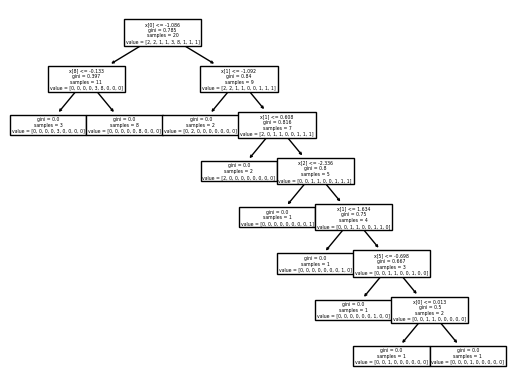

In [50]:
#visualisation de tree
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(data_t, target_t)
tree.plot_tree(clf)

In [51]:
#encodage de data test
for col in (data_test.columns):
  le = LabelEncoder()
  data_test[col] = le.fit_transform(data_test[col])
print(data_test.head(5)) 
# Prédiction sur les données de test
data_test = scaler.transform(data_test)
pca_test = pca.transform(data_test)
prediction = ModelDT.predict(pca_test)

# Évaluation du modèle
from sklearn.metrics import classification_report
print(classification_report(target_test, prediction))

# Prédiction sur une nouvelle observation
new_observation = [[3, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1]] # exemple de ligne à prédire
new_observation = scaler.transform(new_observation)
new_observation = pca.transform(new_observation)
prediction_new_observation = ModelDT.predict(new_observation)
print("La prédiction pour la nouvelle observation est :", prediction_new_observation)



    Douleur Spontanée  Douleur Provoquée  Mobilité  Vitalité  \
17                  3                  1         1         1   
32                  4                  5         1         1   
33                  8                  2         1         1   
26                  0                  0         1         1   
5                   2                  6         0         0   

    Palpation Apicale  Fievre  Asthenie  Odeur Fétide  Médication ATG  \
17                  2       0         0             0               1   
32                  2       0         0             0               0   
33                  2       0         0             0               0   
26                  2       0         0             0               1   
5                   0       1         1             0               2   

    Soulager   Observations Exobuccales ( remarque generale )   
17          0                                                1  
32          3                                 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [52]:
#KNeighborsClassifier
ModelKNN = KNeighborsClassifier(n_neighbors=7)
ModelKNN.fit(data_t, target_t)
sc = ModelKNN.score(data_validation, target_validation)
print('score de la model KNN est ', round(sc*100),"%")

score de la model KNN est  43 %


In [53]:
 # Prédiction sur les données de test
data_test = scaler.transform(data_test)
pca_test = pca.transform(data_test)
prediction = ModelKNN.predict(pca_test)

# Évaluation du modèle
from sklearn.metrics import classification_report
print(classification_report(target_test, prediction))


# Prédiction sur une nouvelle observation
new_observation = [[3, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1]] # exemple de ligne à prédire
new_observation = scaler.transform(new_observation)
new_observation = pca.transform(new_observation)
prediction_new_observation = ModelKNN.predict(new_observation)
print("La prédiction pour la nouvelle observation est :", prediction_new_observation)

                                    precision    recall  f1-score   support

                         Cellulite       0.00      0.00      0.00         1
                         Gingivite       0.00      0.00      0.00         1
Pulpite irreversible symptomatique       0.50      1.00      0.67         5
                Pulpite reversible       0.00      0.00      0.00         3

                          accuracy                           0.50        10
                         macro avg       0.12      0.25      0.17        10
                      weighted avg       0.25      0.50      0.33        10

La prédiction pour la nouvelle observation est : ['Pulpite irreversible symptomatique']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples

In [54]:
#Logistic Regression
ModelLR = LogisticRegression(C =0.1)
ModelLR.fit(data_t, target_t)
sc = ModelLR.score(data_validation, target_validation)
print('score de la model LogisticRegression est ', round(sc*100),"%")

score de la model LogisticRegression est  43 %


In [55]:
 # Prédiction sur les données de test
data_test = scaler.transform(data_test)
pca_test = pca.transform(data_test)
prediction = ModelLR.predict(pca_test)

# Évaluation du modèle
from sklearn.metrics import classification_report
print(classification_report(target_test, prediction))

# Prédiction sur une nouvelle observation
new_observation = [[3, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1]] # exemple de ligne à prédire
new_observation = scaler.transform(new_observation)
new_observation = pca.transform(new_observation)
prediction_new_observation = ModelLR.predict(new_observation)
print("La prédiction pour la nouvelle observation est :", prediction_new_observation)

                                    precision    recall  f1-score   support

                         Cellulite       1.00      1.00      1.00         1
                         Gingivite       0.00      0.00      0.00         1
Pulpite irreversible symptomatique       0.56      1.00      0.71         5
                Pulpite reversible       0.00      0.00      0.00         3

                          accuracy                           0.60        10
                         macro avg       0.39      0.50      0.43        10
                      weighted avg       0.38      0.60      0.46        10

La prédiction pour la nouvelle observation est : ['Pulpite irreversible symptomatique']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples